In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Baralia River.csv')
df

,YEAR,MO,DY,T2M,PRECTOTCORR,Class
0,2017,1,1,19.47,0.00,NaN
1,2017,1,2,20.02,0.00,NaN
2,2017,1,3,19.90,0.00,NaN
3,2017,1,4,20.43,0.00,NaN
4,2017,1,5,18.44,0.00,NaN
...,...,...,...,...,...,...
2551,2023,12,27,20.44,0.00,NaN
2552,2023,12,28,21.08,0.00,NaN
2553,2023,12,29,20.41,0.00,NaN
2554,2023,12,30,20.24,0.00,NaN


In [ ]:
df['Class']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2551    NaN
2552    NaN
2553    NaN
2554    NaN
2555    NaN
Name: Class, Length: 2556, dtype: object

In [ ]:

df['Class'].fillna("No Flood", inplace=True)
#df['Class'].replace('Low',1,inplace=True)

In [ ]:
print(df['Class'].value_counts())

Class
No Flood    2544
Moderate       5
Low            3
High           2
Very Low       1
Low            1
Name: count, dtype: int64


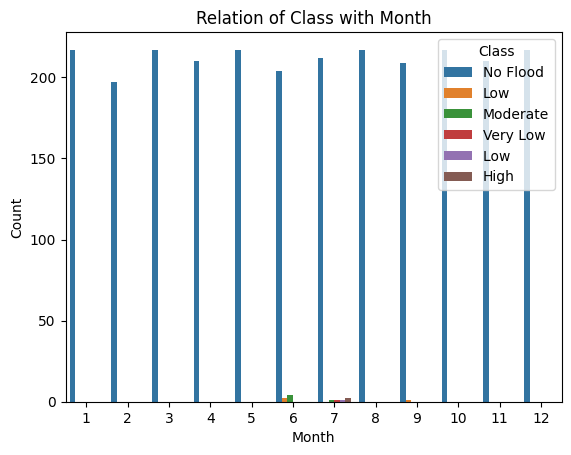

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='MO', hue='Class', data=df)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Relation of Class with Month')
plt.show()


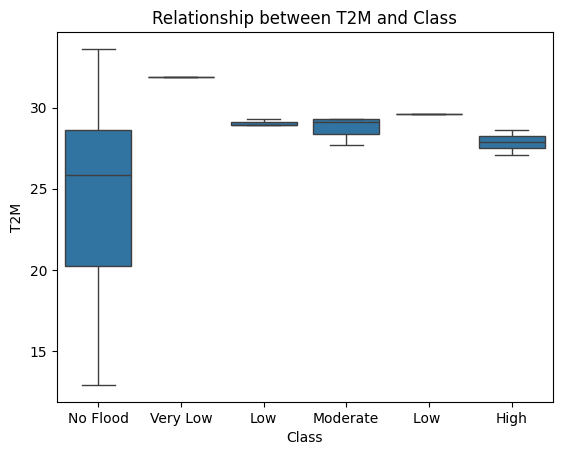

In [ ]:
# prompt: visualize the relationship between T2M and Class

import matplotlib.pyplot as plt
sns.boxplot(x='Class', y='T2M', data=df)
plt.xlabel('Class')
plt.ylabel('T2M')
plt.title('Relationship between T2M and Class')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

# Load the dataset
data = df

# Define features (X) and target variable (y)
X = data[['YEAR', 'MO', 'DY', 'T2M', 'PRECTOTCORR']]
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Use tabulate to print the DataFrame in a box table format
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='fancy_grid'))


Accuracy: 0.9921875
Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤════════════╕
│              │   precision │   recall │   f1-score │    support │
╞══════════════╪═════════════╪══════════╪════════════╪════════════╡
│ Low          │    0        │ 0        │   0        │   2        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Moderate     │    0        │ 0        │   0        │   1        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ No Flood     │    0.996078 │ 0.998035 │   0.997056 │ 509        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy     │    0.992188 │ 0.992188 │   0.992188 │   0.992188 │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ macro avg    │    0.332026 │ 0.332678 │   0.332352 │ 512        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ weighted avg │    0.990242 │ 0.992188 │   0.991214 │ 512        │
╘════

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def predict_flood_class(year, month, day, temperature, rainfall):
    """
    Predict the flood class based on input features.

    Args:
        year (int): Year.
        month (int): Month.
        day (int): Day.
        temperature (float): Temperature.
        rainfall (float): Rainfall.

    Returns:
        str: Predicted flood class.
    """
    # Create input data as DataFrame
    input_data = pd.DataFrame({
        'YEAR': [year],
        'MO': [month],
        'DY': [day],
        'T2M': [temperature],
        'PRECTOTCORR': [rainfall]
    })

    # Make prediction
    predicted_class = rf_classifier.predict(input_data)

    return predicted_class[0]


In [ ]:
predicted_class = predict_flood_class(2023, 18, 7, 13.71, 50.00)
print("Predicted Flood Class:", predicted_class)

Predicted Flood Class: No Flood
